# Analisis y modelado del sistema 

<style>
.justify-text {
  text-align: justify;
}
</style>

<div class="justify-text">
La epidemia del COVID-19 fdsfdasfgdsagfdasfgdasgasdf


</div>

# Introducción
<style>
.justify-text {
  text-align: justify;
}
</style>

<div class="justify-text">



# Derivación del modelo


 El punto de partida es el modelo SEIR básico con la adición de un compartimento adicional L:
 </div>

$$
\begin{align}
    \frac{dS}{dt} &= -\frac{\beta IS}{N} \tag{1} \\
    \frac{dE}{dt} &= \frac{\beta IS}{N} - \epsilon E \tag{2} \\
    \frac{dI}{dt} &= \epsilon E - \gamma I \tag{3} \\
    \frac{dL}{dt} &= \gamma I - \delta L \tag{4} \\
    \frac{dR}{dt} &= \delta L \tag{5}
\end{align}
$$

- $N$: La población total.
- $S$: El número de individuos Susceptibles.
- $E$: El número de individuos Expuestos que han contraído la infección pero aún no son infecciosos.
- $I$: El número de individuos Infectados.
- $L$: El número de sujetos que aún están infectados pero ya no son infecciosos debido a hospitalización, cuarentena, o porque los sujetos infectados son mayormente infecciosos solo durante los primeros días después del final del período de latencia.
- $R$: El número de individuos Recuperados y resistentes a futuras infecciones.
- $\beta$: La tasa de transmisión efectiva.
- $\epsilon$: La tasa inversa del período promedio de incubación antes de que uno se vuelva infeccioso.
- $\gamma$: La tasa inversa del tiempo promedio que los sujetos infectados pasan siendo infecciosos.
- $\delta$: La tasa inversa del tiempo promedio que los sujetos infectados permanecen enfermos pero no infecciosos.


$$
\begin{align}
    \frac{dE_t}{dt} &= \beta(u(t), d(t))I_t - \epsilon E_t \tag{6} \\
    \frac{dI_t}{dt} &= \epsilon E_t - \gamma I_t \tag{7} \\
    \frac{dL_t}{dt} &= \gamma I_t - \delta L_t \tag{8} \\
    \frac{dT_t}{dt} &= \epsilon E_t \tag{9} \\
    N_r(t) &= \epsilon E_t(t - \tau_m) \tag{10} \\
    A_r(t) &= I_t(t - \tau_m) + L_t(t - \tau_m) \tag{11} \\
    T_r(t) &= T_t(t - \tau_m) \tag{12-}
\end{align}
$$

La tabla contiene los parametros para cada pais afectado por la enfermedad, como se observa a continuación:

<br>

<style>
.center {
  margin-left: auto;
  margin-right: auto;
}
table {
  width: 90%;
  border-collapse: collapse;
}
th, td {
  padding: 7px;
  text-align: center;
  border-bottom: 1px solid #ddd;
}

</style>

<center>

| País | Periodo                | $\beta_0$ | $1/\gamma$ | $1/\epsilon$ | $1/\delta$ | $t_{1}, \rho_{1}$ | $t_{2}, \rho_{2}$ | $R_0$ | $R_1$ | $R_2$ | $T_{d0}$ | $T_{d1}$ | $T_m$ |
|---------|-----------------------|---------------|----------------|------------------|----------------|----------------------|----------------------|-----------|-----------|-----------|-------------|-------------|------------|
| China   | 18/01/2020 - 11/02/2020 | 1.6           | 2.5            | 5.0              | N/A            | 0, 0.63              | 5, 0.160             | 4.0       | 2.5       | 0.64      | 2.5         | 4.3         | 12         |
| Italy   | 22/02/2020 - 01/05/2020 | 1.3           | 3.1            | 4.3              | 33             | 2, 0.56              | 19, 0.205            | 4.0       | 2.6       | 0.82      | 2.6         | 5.2         | 9          |
| France  | 28/02/2020 - 03/05/2020 | 1.3           | 2.9            | 5.0              | 29             | 2, 0.60              | 17, 0.195            | 3.8       | 2.8       | 0.74      | 2.8         | 5.3         | 12         |
| UK      | 01/03/2020 - 10/05/2020 | 1.28          | 2.8            | 6.2              | N/A            | 15, 0.65             | 25, 0.270            | 3.6       | 2.34      | 0.97      | 3.4         | 5.8         | 10         |

</center>  

<br>


Se realizará el analisis del modelo en python para cada caso.

# Simulación del Modelo COVID-19 en Python

Para realizar la simulación en python se utilizaran las librerias Solve_ivp, matplotlib y numpy, en donde se van a ocupar en cada caso.

In [847]:

from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
import numpy as np

## Modelo evaluado en parametros de Reino Unido

Se reemplazo el modelo Covid en los parametros del Reino unido:

In [848]:
#Parámetros para el Reino Unido, usando los valores de la Tabla I
beta_0 = 1.28  #Tasa de transmisión inicial
gamma = 1/2.8  #Tasa de recuperación
epsilon = 1/6.2  #Tasa de incubación
delta = 0  #Tasa de mortalidad
tau_m = 10  #Retraso en días
t1 = 15
rho1 = 0.65
t2 = 25
rho2 = 0.27

In [849]:
#Tasa de transmisión que cambia en el tiempo
def beta(t, beta_0, t1, rho1, t2, rho2):
    if t < t1:
        return beta_0
    elif t < t2:
        return beta_0 * rho1
    else:
        return beta_0 * rho2

La función beta, hace que cambie beta_0 para diferentes tiempos.

In [850]:
def covid_model(t, y, beta_0, t1, rho1, t2, rho2, gamma, epsilon, delta):
    E, I, L, T = y
    beta_t = beta(t, beta_0, t1, rho1, t2, rho2)
    
    dEdt = beta_t * I - epsilon * E
    dIdt = epsilon * E - gamma * I
    dLdt = gamma * I - delta * L
    dTdt = epsilon * E
    
    return [dEdt, dIdt, dLdt, dTdt]

In [851]:
#Inicializar historia con condiciones iniciales
E0 = 3500
I0 = 0
L0 = 0
T0 = 0
y0 = [E0, I0, L0, T0]

In [852]:
#Resolver el modelo
t_span = [0, 70]  # Un periodo que abarque suficiente tiempo
t_eval = np.linspace(t_span[0], t_span[1], int(t_span[1] - t_span[0]) + 1)
sol = solve_ivp(covid_model, t_span, y0, args=(beta_0, t1, rho1, t2, rho2, gamma, epsilon, delta), t_eval=t_eval, dense_output=True)

In [853]:
#Interpolación para manejar retrasos
sol_interp = sol.sol

#Calculamos Nr, Ar y Tr con los retrasos
Nr = np.array([epsilon * sol_interp(sol.t[i] - tau_m)[0] if sol.t[i] >= tau_m else 0 for i in range(len(sol.t))])
Ar = np.array([sol_interp(sol.t[i] - tau_m)[1] + sol_interp(sol.t[i] - tau_m)[2] if sol.t[i] >= tau_m else I0 + L0 for i in range(len(sol.t))])
Tr = np.array([sol_interp(sol.t[i] - tau_m)[3] if sol.t[i] >= tau_m else T0 for i in range(len(sol.t))])


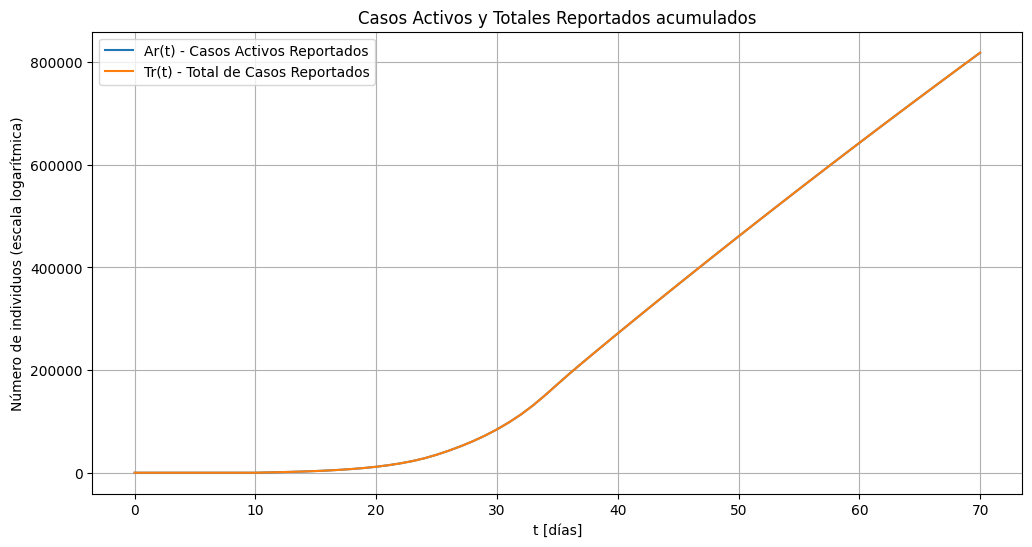

In [854]:
#Graficar Ar y Tr en escala logarítmica
plt.figure(figsize=(12, 6))
plt.plot(sol.t, Ar, label='Ar(t) - Casos Activos Reportados')
plt.plot(sol.t, Tr, label='Tr(t) - Total de Casos Reportados')
plt.title('Casos Activos y Totales Reportados acumulados')
plt.xlabel('t [días]')
plt.ylabel('Número de individuos (escala logarítmica)')
#plt.yscale()  #Establecer la escala del eje Y a logarítmica
plt.legend()
plt.grid(True)
plt.show()

## Conclusión 
La conclusion del grafico esjfggjjg
dfgdsfafgjkldsajf

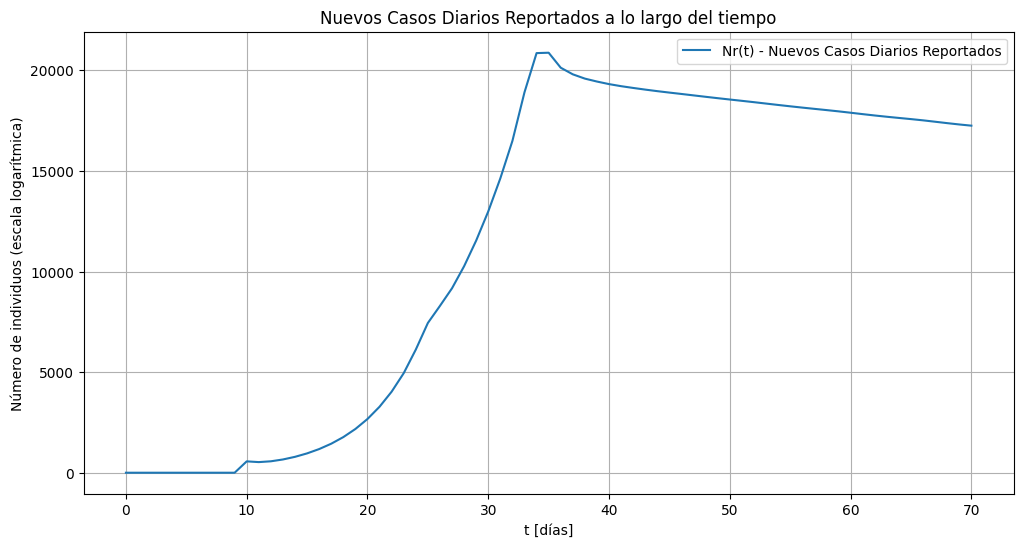

In [855]:
#Graficar Nr en una gráfica separada en escala logarítmica
plt.figure(figsize=(12, 6))
plt.plot(sol.t, Nr, label='Nr(t) - Nuevos Casos Diarios Reportados')
plt.title('Nuevos Casos Diarios Reportados a lo largo del tiempo')
plt.xlabel('t [días]')
plt.ylabel('Número de individuos (escala logarítmica)')
#plt.yscale('log')  #Establecer la escala del eje Y a logarítmica
plt.legend()
plt.grid(True)
plt.show()

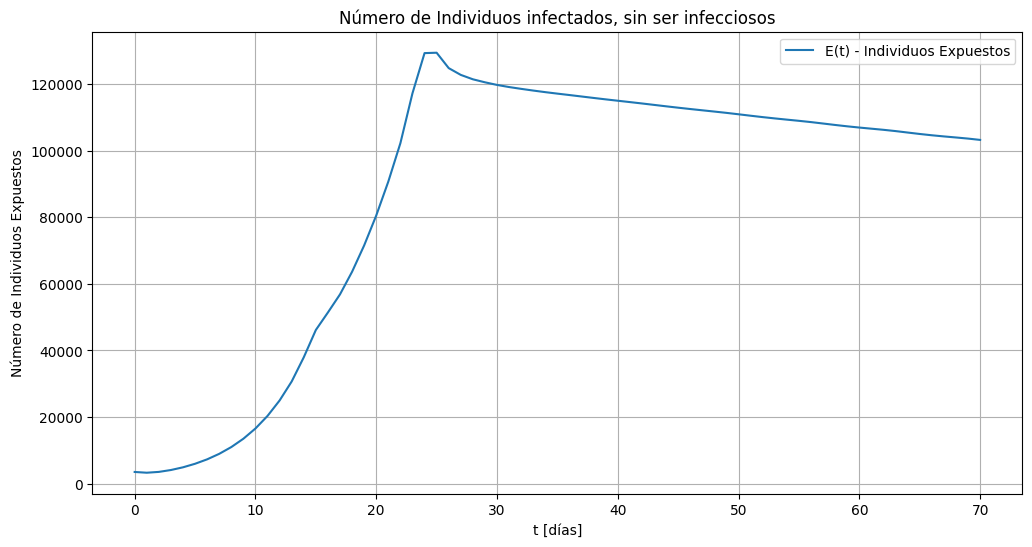

In [856]:
#Graficar E(t)
plt.figure(figsize=(12, 6))
plt.plot(sol.t, sol.y[0], label='E(t) - Individuos Expuestos')
plt.title('Número de Individuos infectados, sin ser infecciosos')
plt.xlabel('t [días]')
plt.ylabel('Número de Individuos Expuestos')
plt.legend()
plt.grid(True)
plt.show()

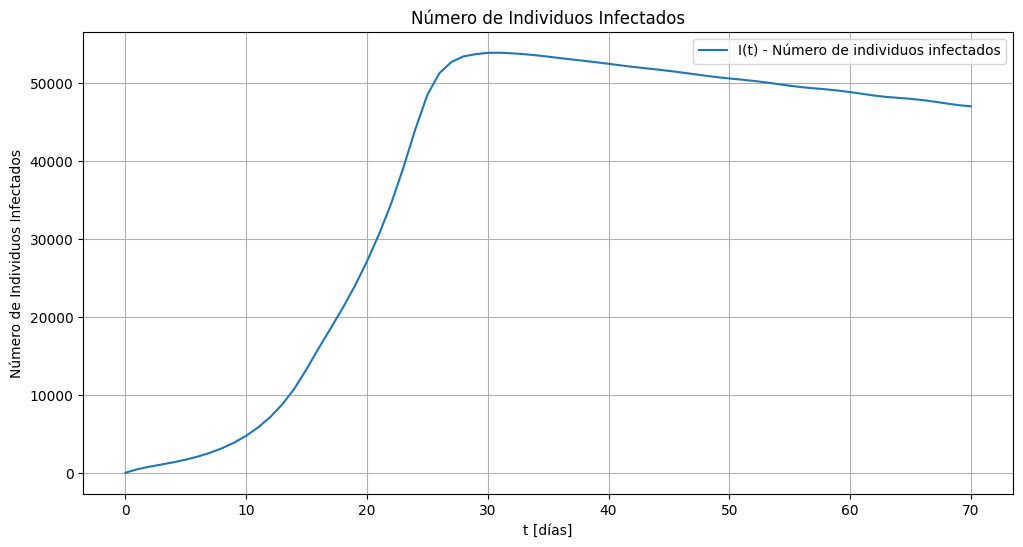

In [857]:
#Graficar I(t)
plt.figure(figsize=(12, 6))
plt.plot(sol.t, sol.y[1], label='I(t) - Número de individuos infectados')
plt.title('Número de Individuos Infectados')
plt.xlabel('t [días]')
plt.ylabel('Número de Individuos Infectados')
plt.legend()
plt.grid(True)
plt.show()

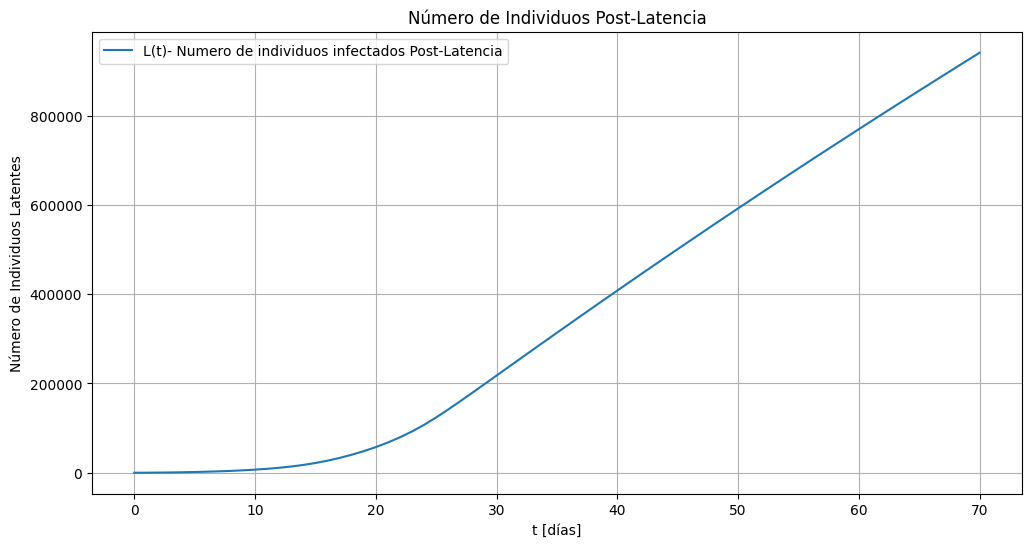

In [858]:
#Graficar L(t)
plt.figure(figsize=(12, 6))
plt.plot(sol.t, sol.y[2], label='L(t)- Numero de individuos infectados Post-Latencia')
plt.title('Número de Individuos Post-Latencia')
plt.xlabel('t [días]')
plt.ylabel('Número de Individuos Latentes')
plt.legend()
plt.grid(True)
plt.show()

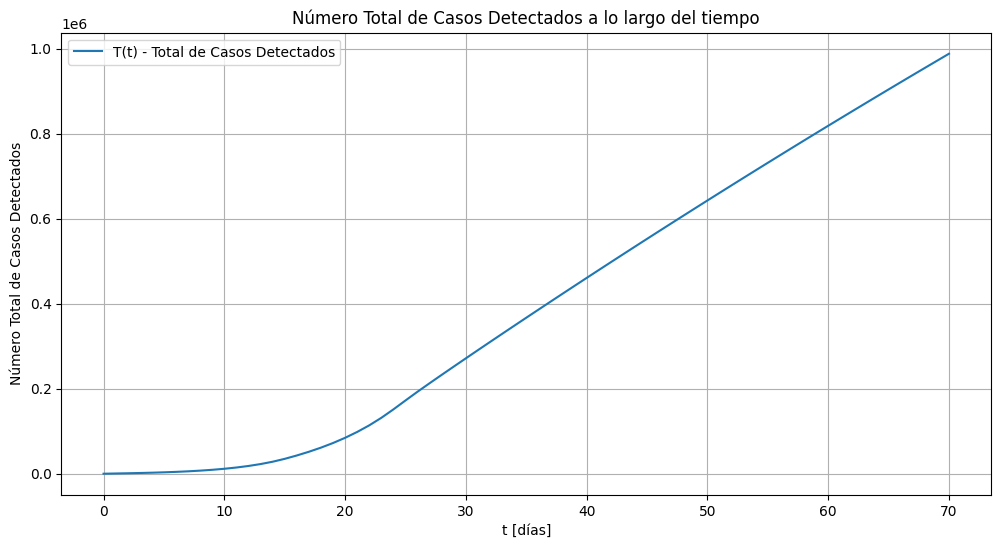

In [859]:
#Graficar T(t)
plt.figure(figsize=(12, 6))
plt.plot(sol.t, sol.y[3], label='T(t) - Total de Casos Detectados')
plt.title('Número Total de Casos Detectados a lo largo del tiempo')
plt.xlabel('t [días]')
plt.ylabel('Número Total de Casos Detectados')
plt.legend()
plt.grid(True)
plt.show()

## Modelo evaluado en parametros de China

Se reemplazo el modelo Covid en los parametros del China:

In [860]:
#Parámetros para el Reino Unido, usando los valores de la Tabla I
beta_0 = 1.6  #Tasa de transmisión inicial
gamma = 1/2.5  #Tasa de recuperación
epsilon = 1/5  #Tasa de incubación
delta = 0  #Tasa de mortalidad
tau_m = 12  #Retraso en días
t1 = 0
rho1 = 0.63
t2 = 5
rho2 = 0.160

In [861]:
#Tasa de transmisión que cambia en el tiempo
def beta(t, beta_0, t1, rho1, t2, rho2):
    if t < t1:
        return beta_0
    elif t < t2:
        return beta_0 * rho1
    else:
        return beta_0 * rho2

In [862]:
def covid_model(t, y, beta_0, t1, rho1, t2, rho2, gamma, epsilon, delta):
    E, I, L, T = y
    beta_t = beta(t, beta_0, t1, rho1, t2, rho2)
    
    dEdt = beta_t * I - epsilon * E
    dIdt = epsilon * E - gamma * I
    dLdt = gamma * I - delta * L
    dTdt = epsilon * E
    
    return [dEdt, dIdt, dLdt, dTdt]

In [863]:
#Inicializar historia con condiciones iniciales
E0 = 3500
I0 = 0
L0 = 0
T0 = 0
y0 = [E0, I0, L0, T0]

In [864]:
#Resolver el modelo
t_span = [0, 70]  # Un periodo que abarque suficiente tiempo
t_eval = np.linspace(t_span[0], t_span[1], int(t_span[1] - t_span[0]) + 1)
sol = solve_ivp(covid_model, t_span, y0, args=(beta_0, t1, rho1, t2, rho2, gamma, epsilon, delta), t_eval=t_eval, dense_output=True)

In [865]:
#Interpolación para manejar retrasos
sol_interp = sol.sol

#Calculamos Nr, Ar y Tr con los retrasos
Nr = np.array([epsilon * sol_interp(sol.t[i] - tau_m)[0] if sol.t[i] >= tau_m else 0 for i in range(len(sol.t))])
Ar = np.array([sol_interp(sol.t[i] - tau_m)[1] + sol_interp(sol.t[i] - tau_m)[2] if sol.t[i] >= tau_m else I0 + L0 for i in range(len(sol.t))])
Tr = np.array([sol_interp(sol.t[i] - tau_m)[3] if sol.t[i] >= tau_m else T0 for i in range(len(sol.t))])

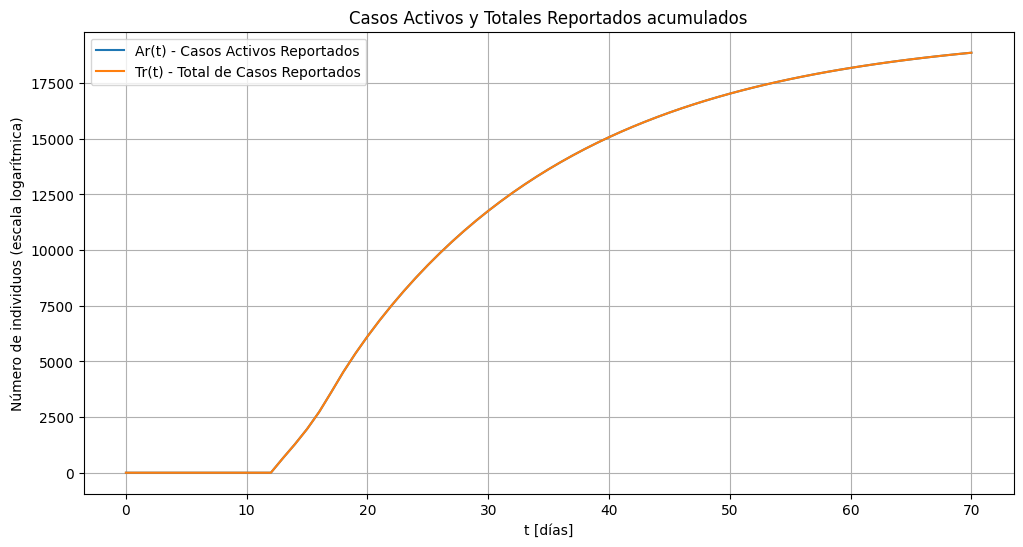

In [866]:
#Graficar Ar y Tr en escala logarítmica
plt.figure(figsize=(12, 6))
plt.plot(sol.t, Ar, label='Ar(t) - Casos Activos Reportados')
plt.plot(sol.t, Tr, label='Tr(t) - Total de Casos Reportados')
plt.title('Casos Activos y Totales Reportados acumulados')
plt.xlabel('t [días]')
plt.ylabel('Número de individuos (escala logarítmica)')
#plt.yscale('log')  #Establecer la escala del eje Y a logarítmica
plt.legend()
plt.grid(True)
plt.show()

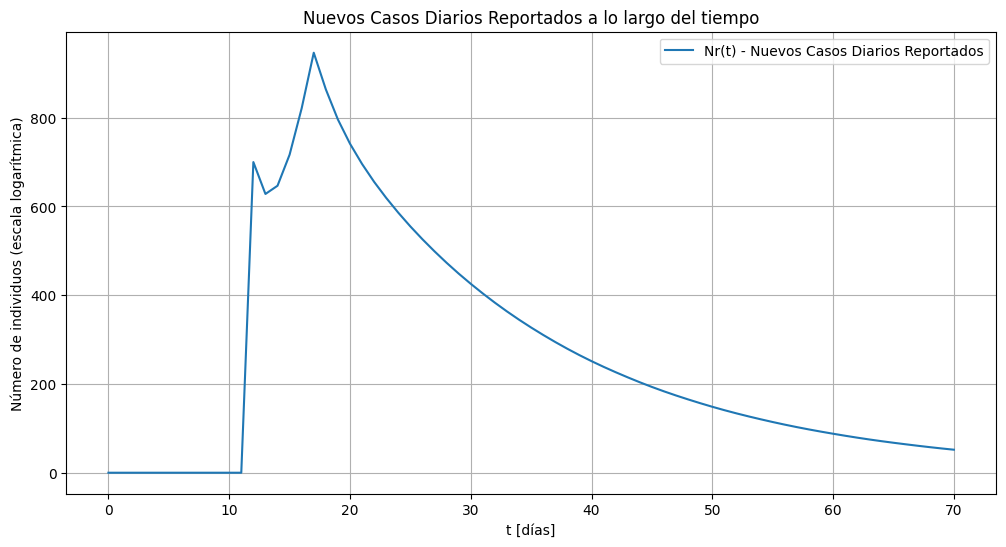

In [867]:
#Graficar Nr en una gráfica separada en escala logarítmica
plt.figure(figsize=(12, 6))
plt.plot(sol.t, Nr, label='Nr(t) - Nuevos Casos Diarios Reportados')
plt.title('Nuevos Casos Diarios Reportados a lo largo del tiempo')
plt.xlabel('t [días]')
plt.ylabel('Número de individuos (escala logarítmica)')
#plt.yscale('log')  #Establecer la escala del eje Y a logarítmica
plt.legend()
plt.grid(True)
plt.show()

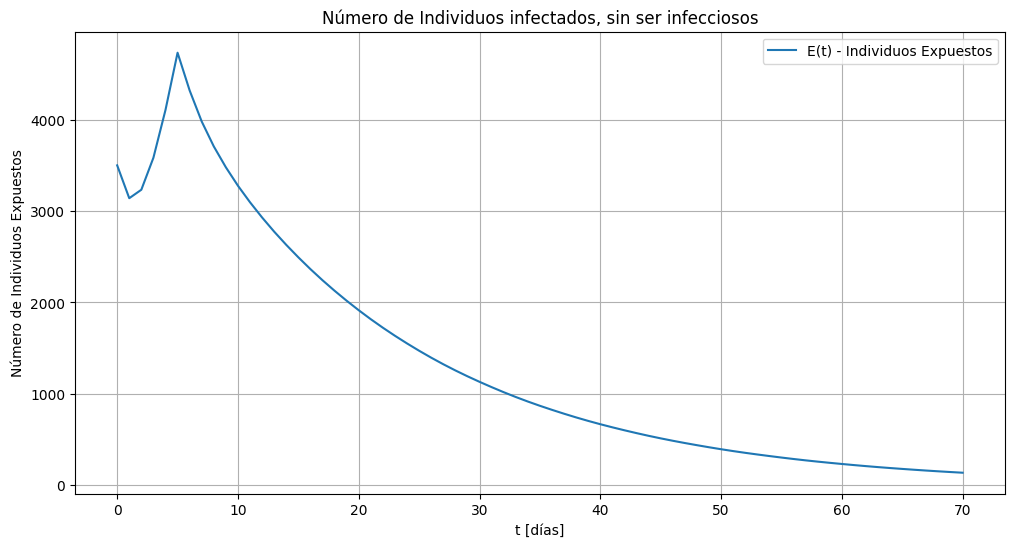

In [868]:
#Graficar E(t)
plt.figure(figsize=(12, 6))
plt.plot(sol.t, sol.y[0], label='E(t) - Individuos Expuestos')
plt.title('Número de Individuos infectados, sin ser infecciosos')
plt.xlabel('t [días]')
plt.ylabel('Número de Individuos Expuestos')
plt.legend()
plt.grid(True)
plt.show()

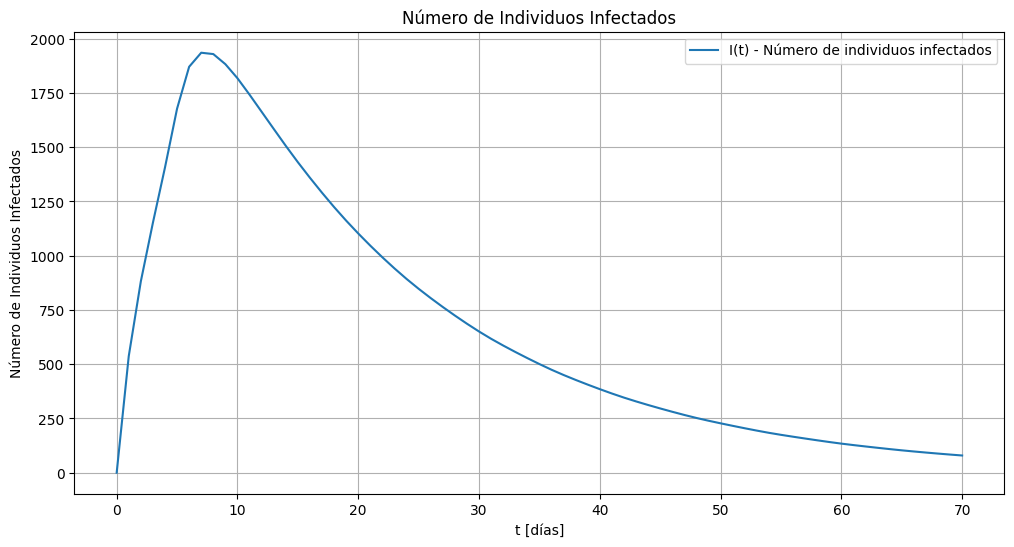

In [869]:
#Graficar I(t)
plt.figure(figsize=(12, 6))
plt.plot(sol.t, sol.y[1], label='I(t) - Número de individuos infectados')
plt.title('Número de Individuos Infectados')
plt.xlabel('t [días]')
plt.ylabel('Número de Individuos Infectados')
plt.legend()
plt.grid(True)
plt.show()

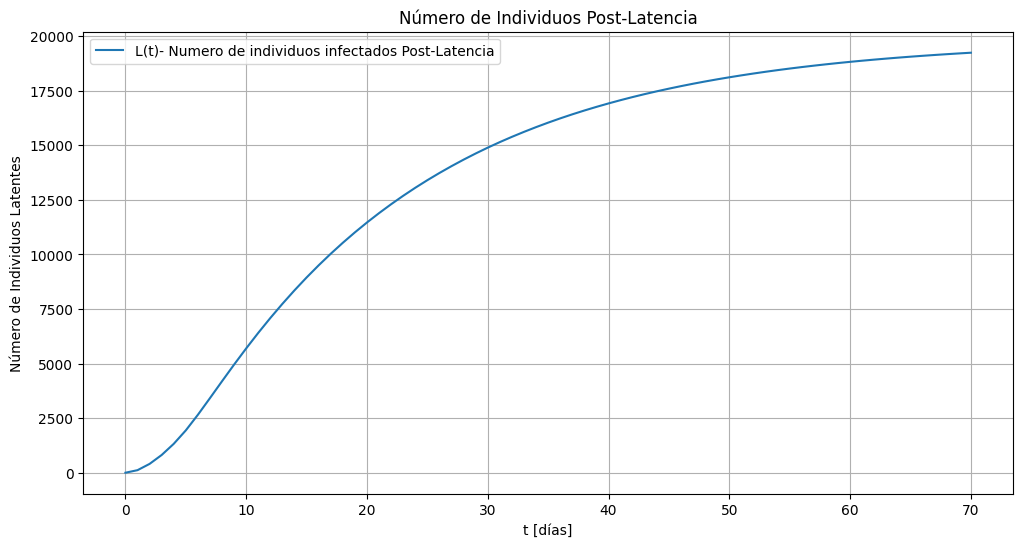

In [870]:
#Graficar L(t)
plt.figure(figsize=(12, 6))
plt.plot(sol.t, sol.y[2], label='L(t)- Numero de individuos infectados Post-Latencia')
plt.title('Número de Individuos Post-Latencia')
plt.xlabel('t [días]')
plt.ylabel('Número de Individuos Latentes')
plt.legend()
plt.grid(True)
plt.show()

dhfefhddfhdaskh

Ideas:
- tengo que simular hasta 100 dias.

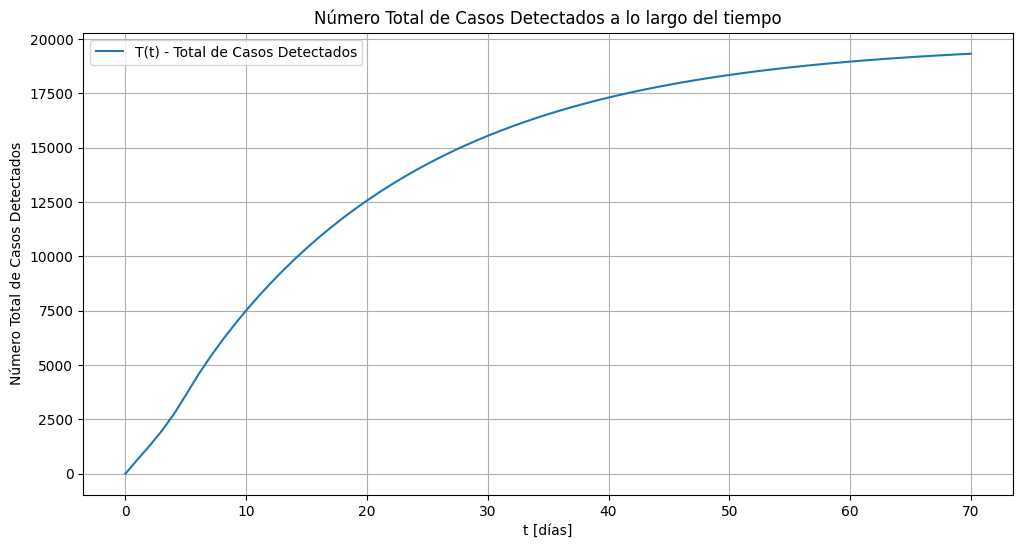

In [871]:
#Graficar T(t)
plt.figure(figsize=(12, 6))
plt.plot(sol.t, sol.y[3], label='T(t) - Total de Casos Detectados')
plt.title('Número Total de Casos Detectados a lo largo del tiempo')
plt.xlabel('t [días]')
plt.ylabel('Número Total de Casos Detectados')
plt.legend()
plt.grid(True)
plt.show()

## Modelo evaluado en parametros de Italia

Se reemplazo el modelo Covid en los parametros del Italia:

In [872]:
#Parámetros para el Reino Unido, usando los valores de la Tabla I
beta_0 = 1.3  #Tasa de transmisión inicial
gamma = 1/3.1  #Tasa de recuperación
epsilon = 1/4.3  #Tasa de incubación
delta = 1/33  #Tasa de mortalidad
tau_m = 9  #Retraso en días
t1 = 2
rho1 = 0.56
t2 = 19
rho2 = 0.205

In [873]:
#Tasa de transmisión que cambia en el tiempo
def beta(t, beta_0, t1, rho1, t2, rho2):
    if t < t1:
        return beta_0
    elif t < t2:
        return beta_0 * rho1
    else:
        return beta_0 * rho2

In [874]:
def covid_model(t, y, beta_0, t1, rho1, t2, rho2, gamma, epsilon, delta):
    E, I, L, T = y
    beta_t = beta(t, beta_0, t1, rho1, t2, rho2)
    
    dEdt = beta_t* I - epsilon * E
    dIdt = epsilon * E - gamma * I
    dLdt = gamma * I - delta * L
    dTdt = epsilon * E
    
    return [dEdt, dIdt, dLdt, dTdt]

In [875]:
# Parámetros adicionales
R0 = 4  #El número básico de reproducción, ajustar según el país o la situación

#Calculando gamma (tasa de recuperación) y r0 (eigenvalor)
r0 = ((-(epsilon + gamma)) + np.sqrt((epsilon + gamma)**2 + 4 * epsilon * (beta_0 - gamma))) / 2

#Condición inicial para I0
I0 = 67

# Calculando la condición inicial para E0
E0 = beta_0 * I0 / (r0 + epsilon)

# Inicializar historia con condiciones iniciales
L0 = 0  #Asumiendo que L0 es igual a I0
T0 = 0  #Asumiendo que T0 es igual a I0
y0 = [E0, I0, L0, T0]

In [876]:
#Resolver el modelo
t_span = [0, 70]  # Un periodo que abarque suficiente tiempo
t_eval = np.linspace(t_span[0], t_span[1], int(t_span[1] - t_span[0]) + 1)
sol = solve_ivp(covid_model, t_span, y0, args=(beta_0, t1, rho1, t2, rho2, gamma, epsilon, delta), t_eval=t_eval, dense_output=True)

In [877]:
#Interpolación para manejar retrasos
sol_interp = sol.sol

#Calculamos Nr, Ar y Tr con los retrasos
Nr = np.array([epsilon * sol_interp(sol.t[i] - tau_m)[0] if sol.t[i] >= tau_m else 0 for i in range(len(sol.t))])
Ar = np.array([sol_interp(sol.t[i] - tau_m)[1] + sol_interp(sol.t[i] - tau_m)[2] if sol.t[i] >= tau_m else I0 + L0 for i in range(len(sol.t))])
Tr = np.array([sol_interp(sol.t[i] - tau_m)[3] if sol.t[i] >= tau_m else T0 for i in range(len(sol.t))])

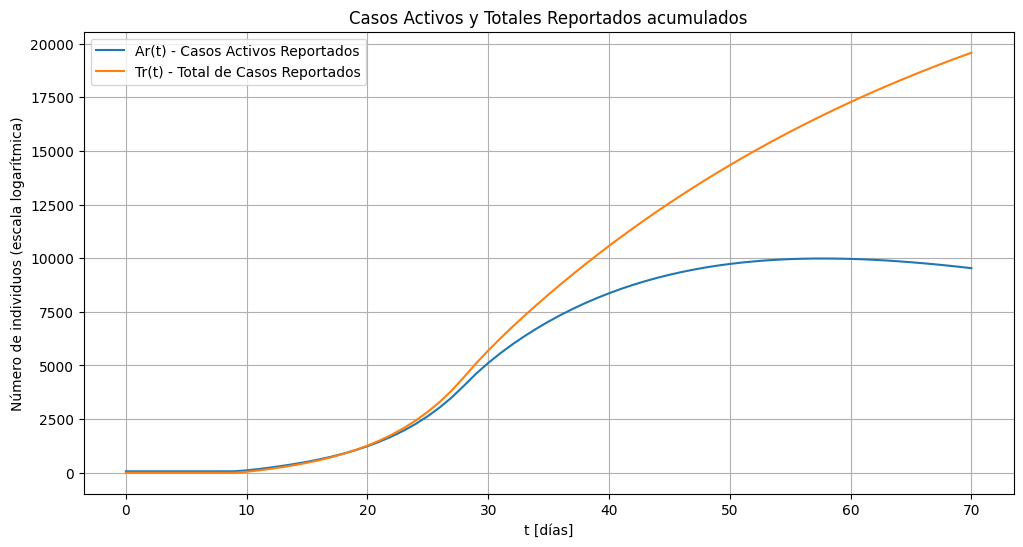

In [878]:
#Graficar Ar y Tr en escala logarítmica
plt.figure(figsize=(12, 6))
plt.plot(sol.t, Ar, label='Ar(t) - Casos Activos Reportados')
plt.plot(sol.t, Tr, label='Tr(t) - Total de Casos Reportados')
plt.title('Casos Activos y Totales Reportados acumulados')
plt.xlabel('t [días]')
plt.ylabel('Número de individuos (escala logarítmica)')
#plt.yscale('log')  #Establecer la escala del eje Y a logarítmica
plt.legend()
plt.grid(True)
plt.show()

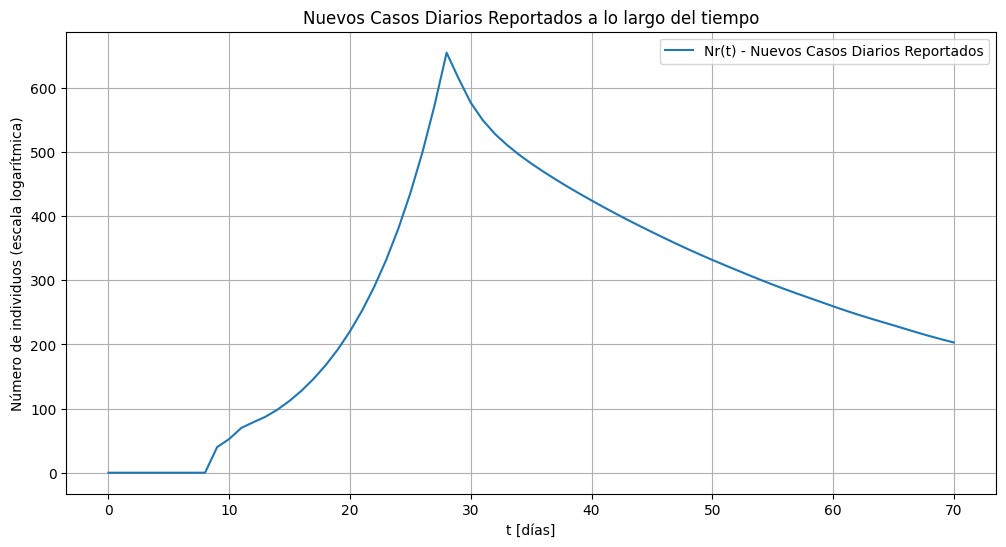

In [879]:
#Graficar Nr en una gráfica separada en escala logarítmica
plt.figure(figsize=(12, 6))
plt.plot(sol.t, Nr, label='Nr(t) - Nuevos Casos Diarios Reportados')
plt.title('Nuevos Casos Diarios Reportados a lo largo del tiempo')
plt.xlabel('t [días]')
plt.ylabel('Número de individuos (escala logarítmica)')
#plt.yscale('log')  #Establecer la escala del eje Y a logarítmica
plt.legend()
plt.grid(True)
plt.show()

- Ver como inicia Nr para valores t>=tau_m

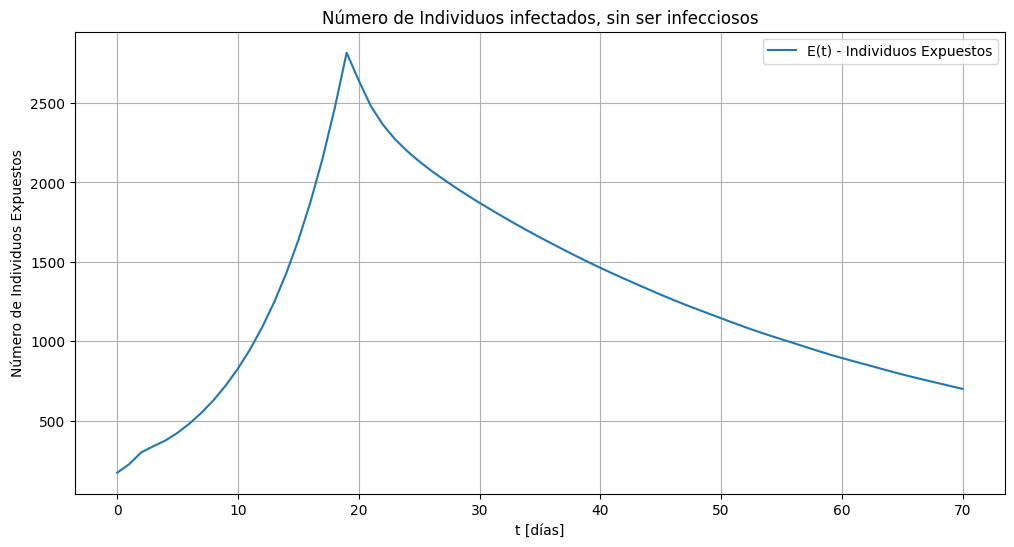

In [880]:
#Graficar E(t)
plt.figure(figsize=(12, 6))
plt.plot(sol.t, sol.y[0], label='E(t) - Individuos Expuestos')
plt.title('Número de Individuos infectados, sin ser infecciosos')
plt.xlabel('t [días]')
plt.ylabel('Número de Individuos Expuestos')
plt.legend()
plt.grid(True)
plt.show()

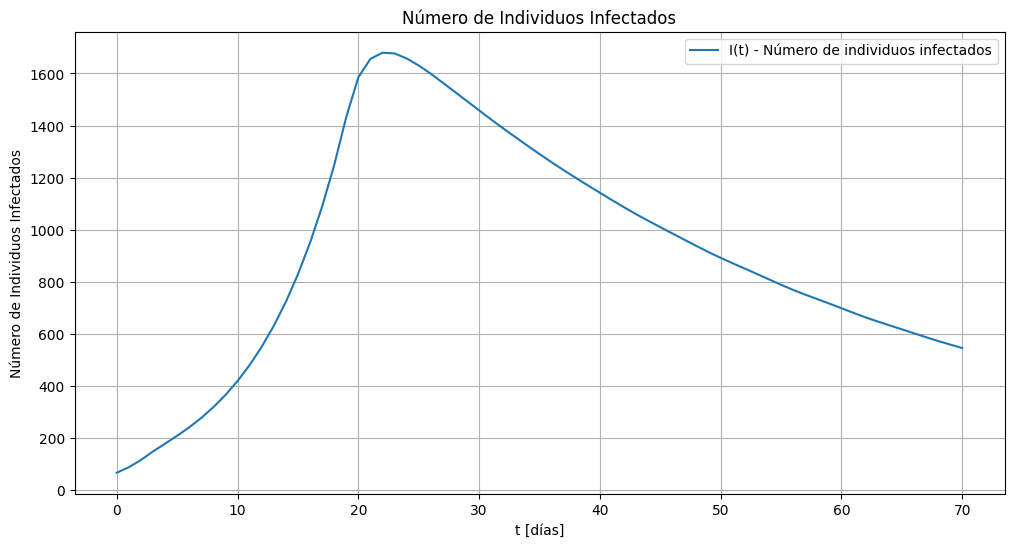

In [881]:
#Graficar I(t)
plt.figure(figsize=(12, 6))
plt.plot(sol.t, sol.y[1], label='I(t) - Número de individuos infectados')
plt.title('Número de Individuos Infectados')
plt.xlabel('t [días]')
plt.ylabel('Número de Individuos Infectados')
plt.legend()
plt.grid(True)
plt.show()

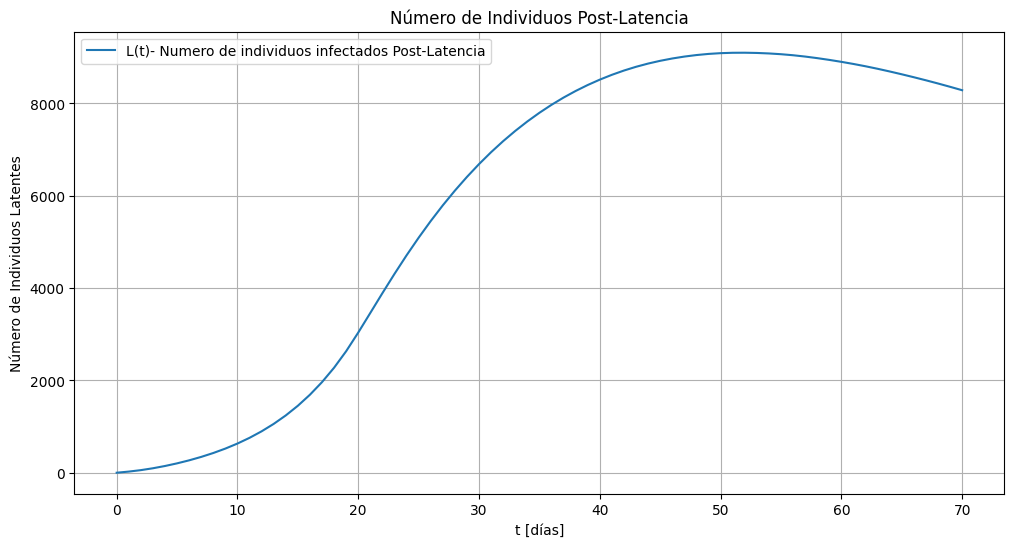

In [882]:
#Graficar L(t)
plt.figure(figsize=(12, 6))
plt.plot(sol.t, sol.y[2], label='L(t)- Numero de individuos infectados Post-Latencia')
plt.title('Número de Individuos Post-Latencia')
plt.xlabel('t [días]')
plt.ylabel('Número de Individuos Latentes')
plt.legend()
plt.grid(True)
plt.show()

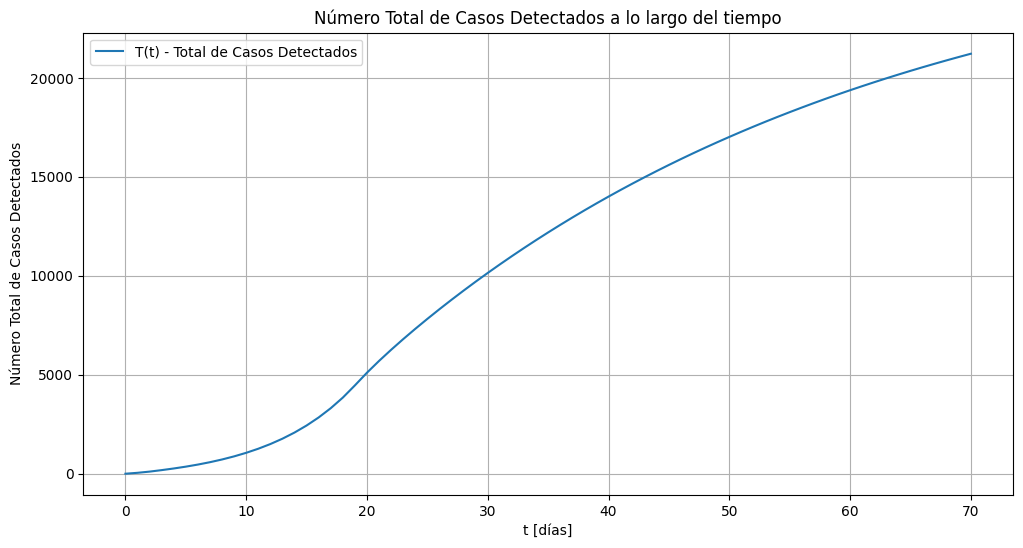

In [883]:
#Graficar T(t)
plt.figure(figsize=(12, 6))
plt.plot(sol.t, sol.y[3], label='T(t) - Total de Casos Detectados')
plt.title('Número Total de Casos Detectados a lo largo del tiempo')
plt.xlabel('t [días]')
plt.ylabel('Número Total de Casos Detectados')
plt.legend()
plt.grid(True)
plt.show()

## Modelo evaluado en parametros de Francia

Se reemplazo el modelo Covid en los parametros del Francia:

In [884]:
#Parámetros para el Reino Unido, usando los valores de la Tabla I
beta_0 = 1.3  #Tasa de transmisión inicial
gamma = 1/2.9  #Tasa de recuperación
epsilon = 1/5.0  #Tasa de incubación
delta = 29  #Tasa de mortalidad
tau_m = 12  #Retraso en días
t1 = 2
rho1 = 0.60
t2 = 17
rho2 = 0.195

In [885]:
#Tasa de transmisión que cambia en el tiempo
def beta(t, beta_0, t1, rho1, t2, rho2):
    if t < t1:
        return beta_0
    elif t < t2:
        return beta_0 * rho1
    else:
        return beta_0 * rho2

In [886]:
def covid_model(t, y, beta_0, t1, rho1, t2, rho2, gamma, epsilon, delta):
    E, I, L, T = y
    beta_t = beta(t, beta_0, t1, rho1, t2, rho2)
    
    dEdt = beta_t * I - epsilon * E
    dIdt = epsilon * E - gamma * I
    dLdt = gamma * I - delta * L
    dTdt = epsilon * E
    
    return [dEdt, dIdt, dLdt, dTdt]

In [887]:
#Inicializar historia con condiciones iniciales
E0 = 3500
I0 = 0
L0 = 0
T0 = 0
y0 = [E0, I0, L0, T0]

In [888]:
#Resolver el modelo
t_span = [0, 70]  # Un periodo que abarque suficiente tiempo
t_eval = np.linspace(t_span[0], t_span[1], int(t_span[1] - t_span[0]) + 1)
sol = solve_ivp(covid_model, t_span, y0, args=(beta_0, t1, rho1, t2, rho2, gamma, epsilon, delta), t_eval=t_eval, dense_output=True)

In [889]:
#Interpolación para manejar retrasos
sol_interp = sol.sol

#Calculamos Nr, Ar y Tr con los retrasos
Nr = np.array([epsilon * sol_interp(sol.t[i] - tau_m)[0] if sol.t[i] >= tau_m else 0 for i in range(len(sol.t))])
Ar = np.array([sol_interp(sol.t[i] - tau_m)[1] + sol_interp(sol.t[i] - tau_m)[2] if sol.t[i] >= tau_m else I0 + L0 for i in range(len(sol.t))])
Tr = np.array([sol_interp(sol.t[i] - tau_m)[3] if sol.t[i] >= tau_m else T0 for i in range(len(sol.t))])

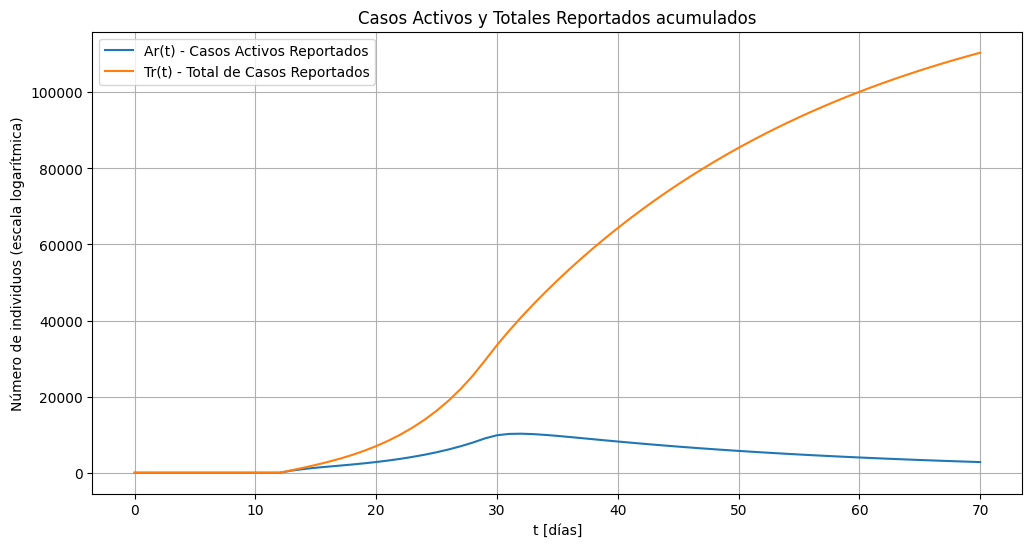

In [890]:
#Graficar Ar y Tr en escala logarítmica
plt.figure(figsize=(12, 6))
plt.plot(sol.t, Ar, label='Ar(t) - Casos Activos Reportados')
plt.plot(sol.t, Tr, label='Tr(t) - Total de Casos Reportados')
plt.title('Casos Activos y Totales Reportados acumulados')
plt.xlabel('t [días]')
plt.ylabel('Número de individuos (escala logarítmica)')
#plt.yscale('log')  #Establecer la escala del eje Y a logarítmica
plt.legend()
plt.grid(True)
plt.show()

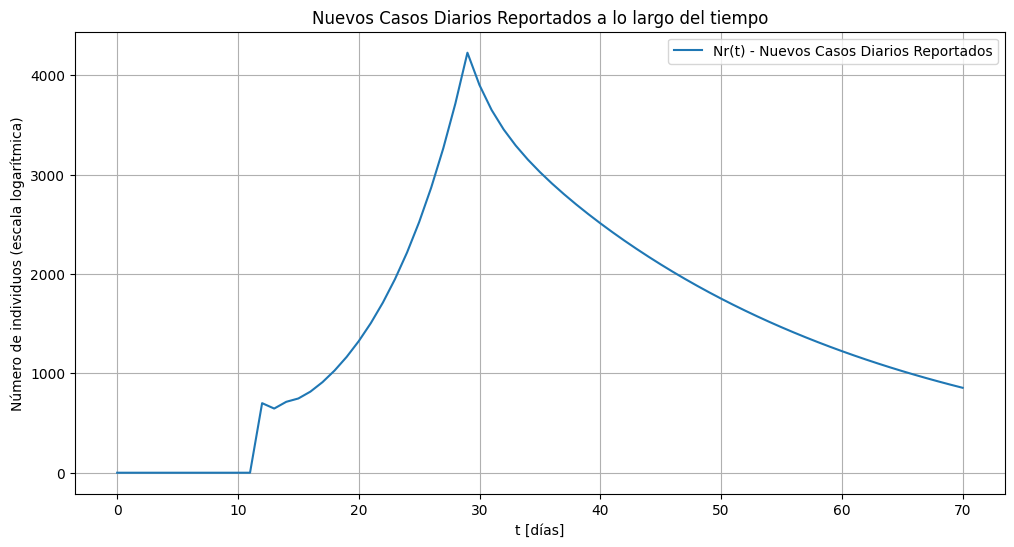

In [891]:
#Graficar Nr en una gráfica separada en escala logarítmica
plt.figure(figsize=(12, 6))
plt.plot(sol.t, Nr, label='Nr(t) - Nuevos Casos Diarios Reportados')
plt.title('Nuevos Casos Diarios Reportados a lo largo del tiempo')
plt.xlabel('t [días]')
plt.ylabel('Número de individuos (escala logarítmica)')
#plt.yscale('log')  #Establecer la escala del eje Y a logarítmica
plt.legend()
plt.grid(True)
plt.show()

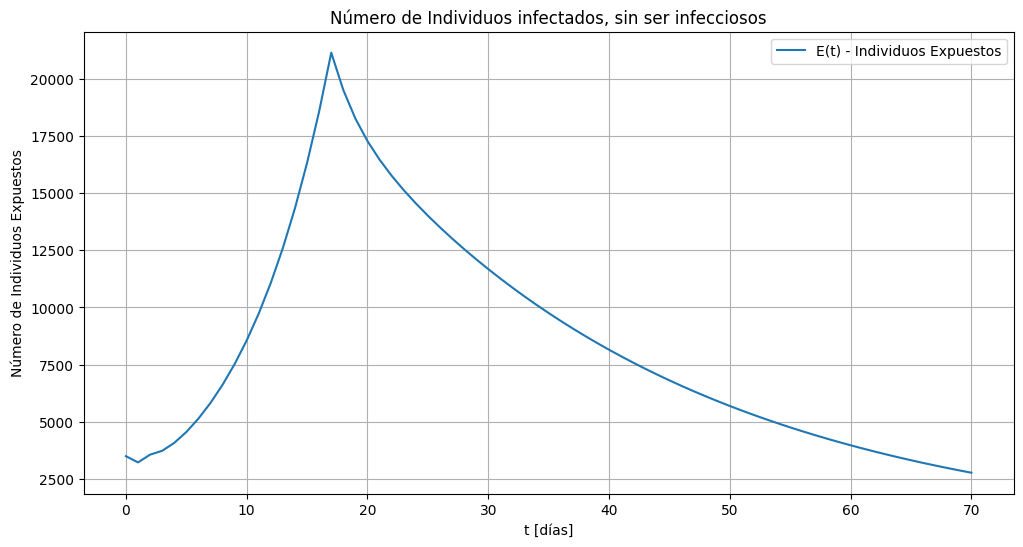

In [892]:
#Graficar E(t)
plt.figure(figsize=(12, 6))
plt.plot(sol.t, sol.y[0], label='E(t) - Individuos Expuestos')
plt.title('Número de Individuos infectados, sin ser infecciosos')
plt.xlabel('t [días]')
plt.ylabel('Número de Individuos Expuestos')
plt.legend()
plt.grid(True)
plt.show()

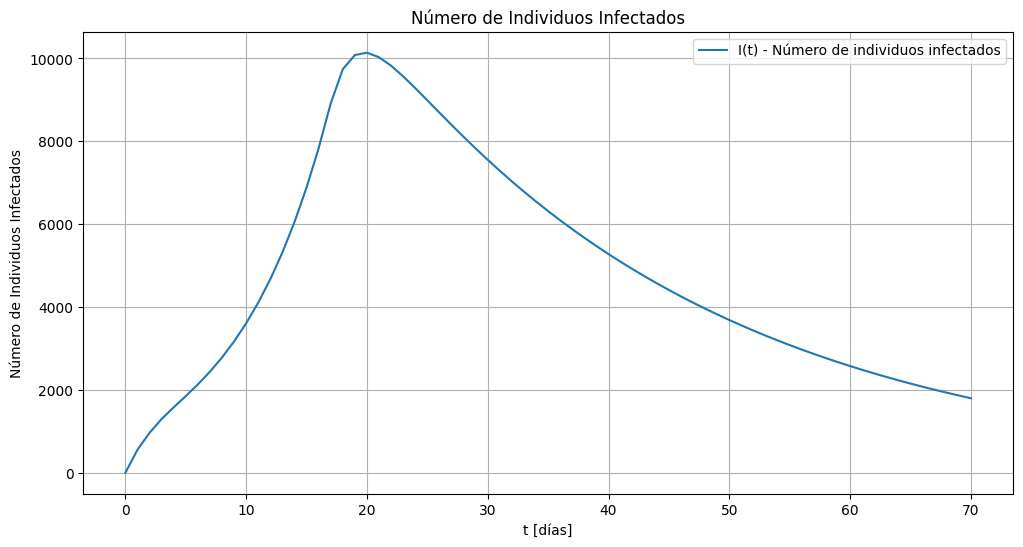

In [893]:
#Graficar I(t)
plt.figure(figsize=(12, 6))
plt.plot(sol.t, sol.y[1], label='I(t) - Número de individuos infectados')
plt.title('Número de Individuos Infectados')
plt.xlabel('t [días]')
plt.ylabel('Número de Individuos Infectados')
plt.legend()
plt.grid(True)
plt.show()

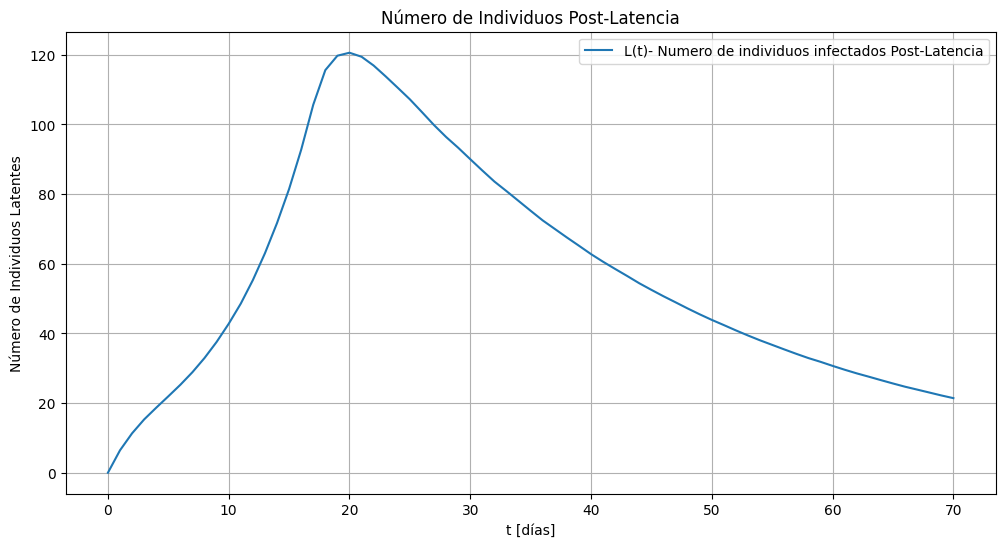

In [894]:
#Graficar L(t)
plt.figure(figsize=(12, 6))
plt.plot(sol.t, sol.y[2], label='L(t)- Numero de individuos infectados Post-Latencia')
plt.title('Número de Individuos Post-Latencia')
plt.xlabel('t [días]')
plt.ylabel('Número de Individuos Latentes')
plt.legend()
plt.grid(True)
plt.show()

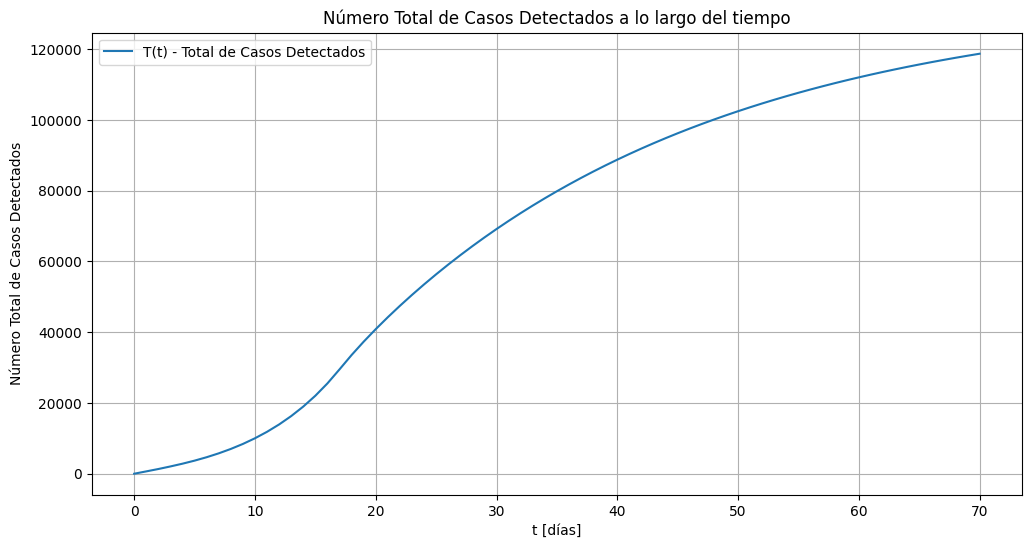

In [895]:
#Graficar T(t)
plt.figure(figsize=(12, 6))
plt.plot(sol.t, sol.y[3], label='T(t) - Total de Casos Detectados')
plt.title('Número Total de Casos Detectados a lo largo del tiempo')
plt.xlabel('t [días]')
plt.ylabel('Número Total de Casos Detectados')
plt.legend()
plt.grid(True)
plt.show()

# Variación de la entrada $u(t)$
En este caso se hace variar la entrada $u(t)$ para el caso de Italia:


In [896]:
#Parámetros para el Reino Unido, usando los valores de la Tabla I
beta_0 = 1.3  #Tasa de infectividad inicial
gamma = 1/3.1  #Tasa de recuperación
epsilon = 1/4.3  #Tasa de latencia
delta = 1/33  #Tasa de mortalidad
tau_m = 9  #Retraso en dias
t1 = 2
rho1 = 0.56
t2 = 19
rho2 = 0.205


In [897]:
#Función de entrada u(t) con valor variable
def u(t, u_valor):
    return u_valor  

#Lista de valores para ola entrada u(t)
u_valores = [0.2, 0.5, 0.7, 0.9]

#Tasa de transmisión que cambia en el tiempo
def beta(t, beta_0, t1, rho1, t2, rho2, u_valor):
    #u(t) con valor variable
    ut = u(t, u_valor)
    if t < t1:
        return beta_0 / ut
    elif t < t2:
        return (beta_0 * rho1) / ut
    else:
        return (beta_0 * rho2) / ut

In [898]:
def covid_model(t, y, beta_0, t1, rho1, t2, rho2, gamma, epsilon, delta, u_valor):
    E, I, L, T = y
    beta_t = beta(t, beta_0, t1, rho1, t2, rho2, u_valor)
    
    dEdt = beta_t * I - epsilon * E
    dIdt = epsilon * E - gamma * I
    dLdt = gamma * I - delta * L
    dTdt = epsilon * E
    
    return [dEdt, dIdt, dLdt, dTdt]

In [899]:
# Parámetros adicionales
R0 = 4  #El número básico de reproducción, ajustar según el país o la situación

#Calculando gamma (tasa de recuperación) y r0 (eigenvalor)
r0 = ((-(epsilon + gamma)) + np.sqrt((epsilon + gamma)**2 + 4 * epsilon * (beta_0 - gamma))) / 2

#Condición inicial para I0
I0 = 67

# Calculando la condición inicial para E0
E0 = beta_0 * I0 / (r0 + epsilon)

# Inicializar historia con condiciones iniciales
L0 = 0  #Asumiendo que L0 es igual a I0
T0 = 0  #Asumiendo que T0 es igual a I0
y0 = [E0, I0, L0, T0]

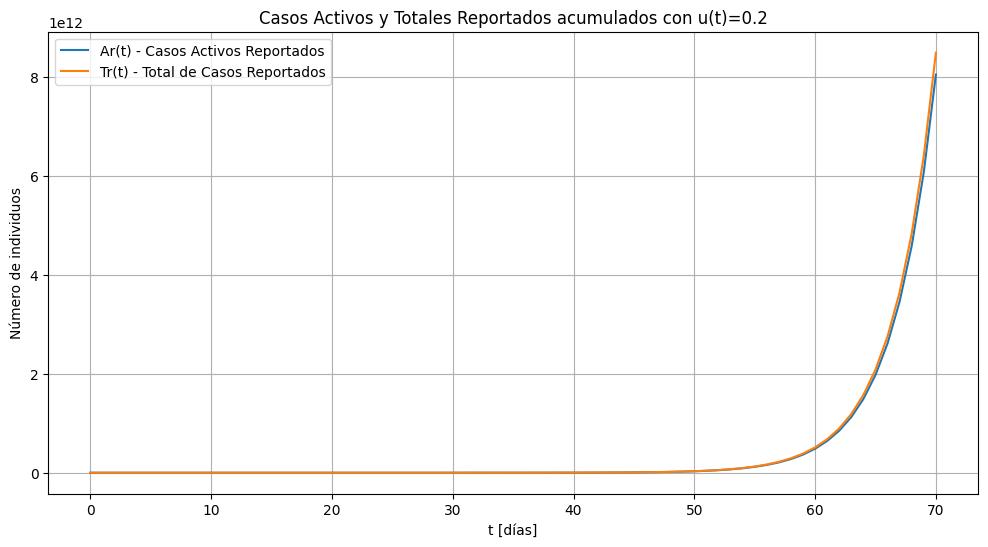

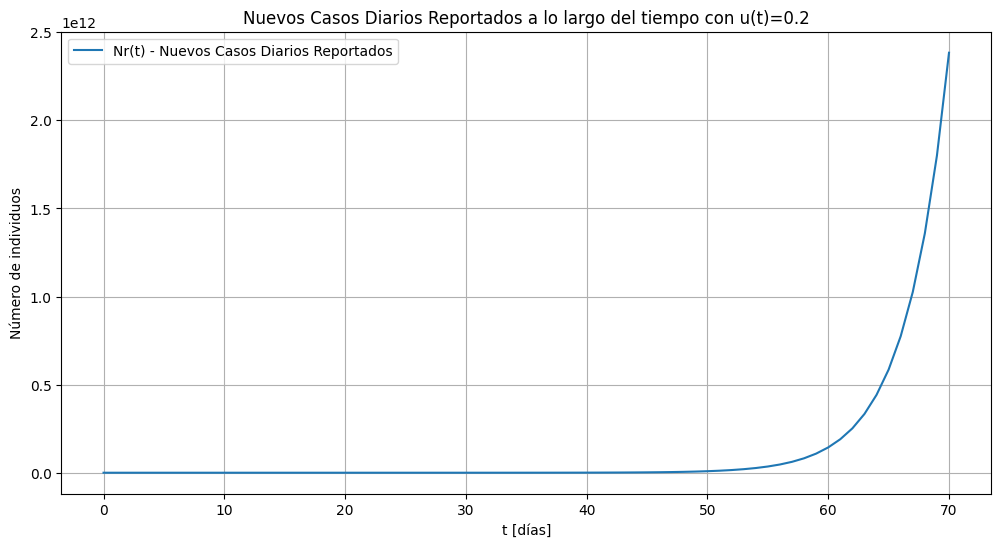

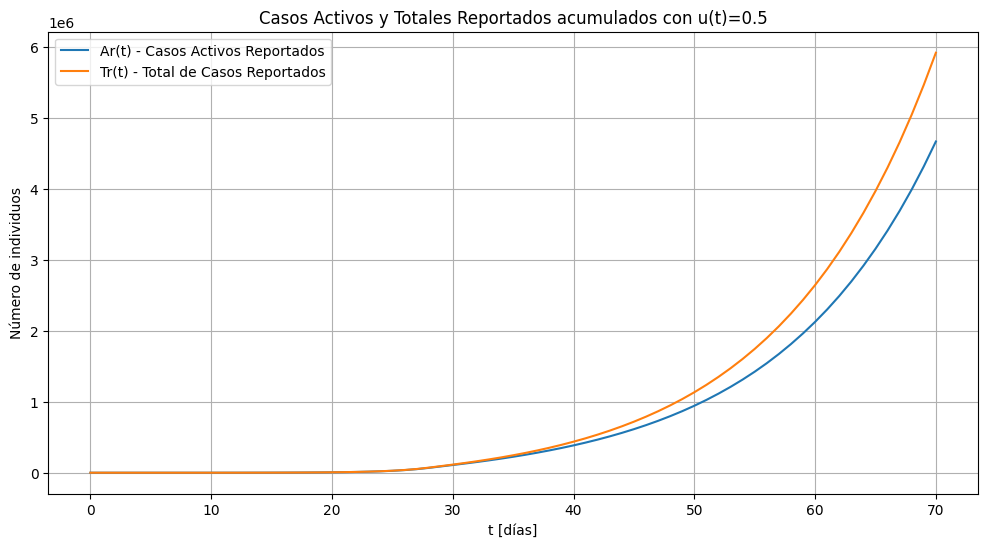

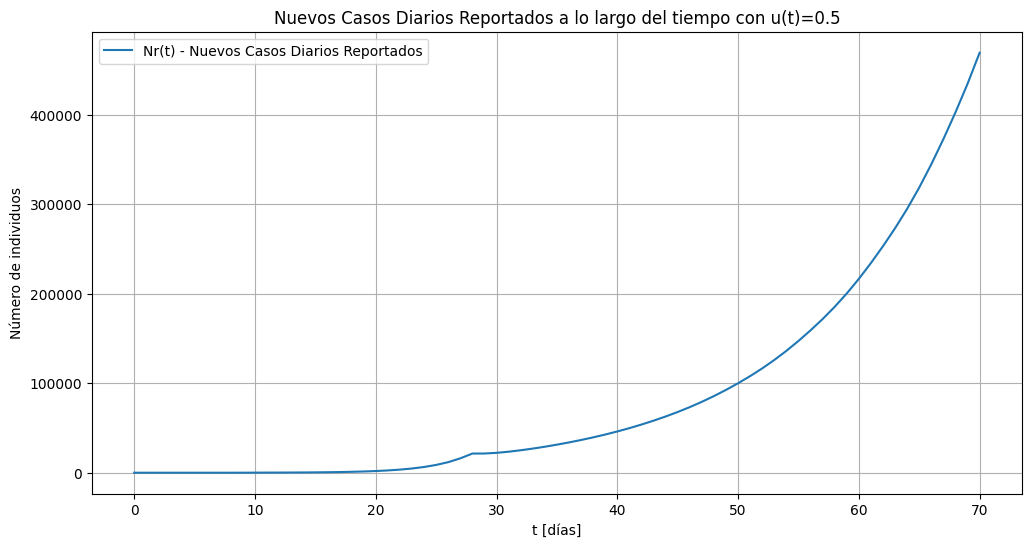

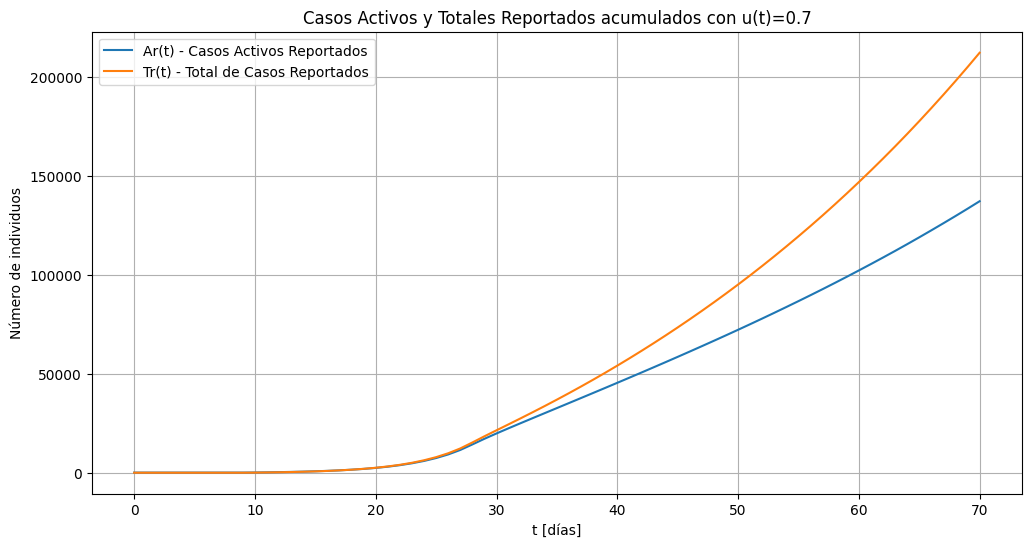

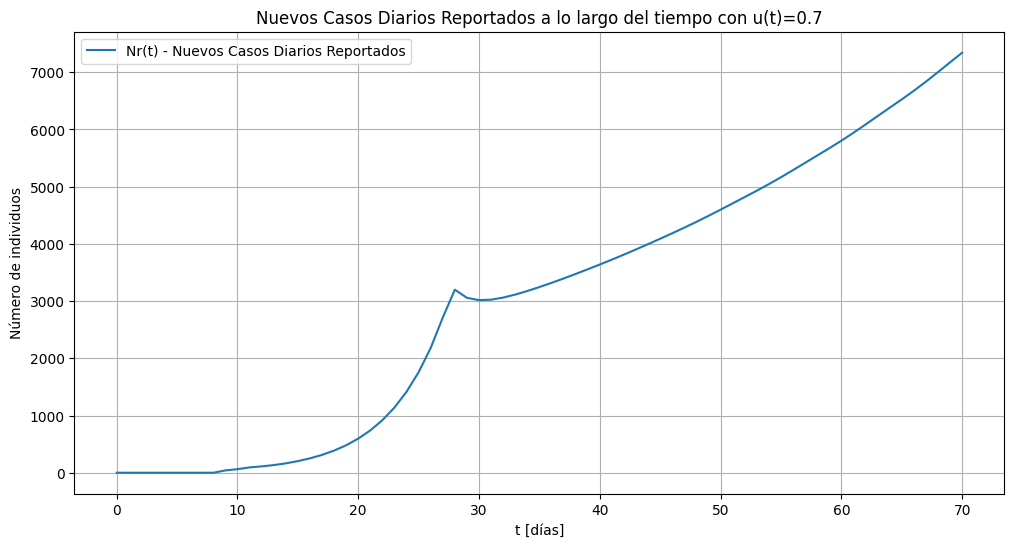

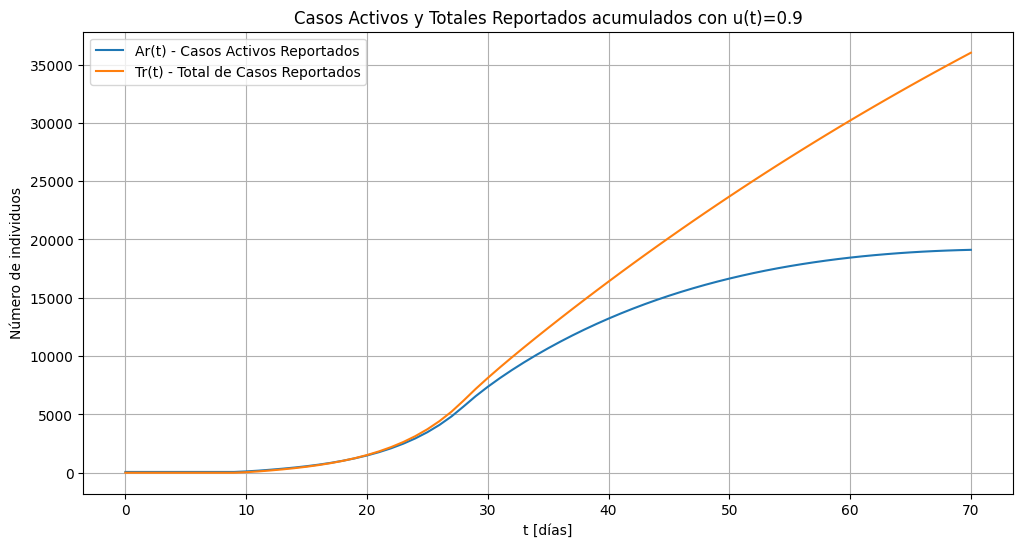

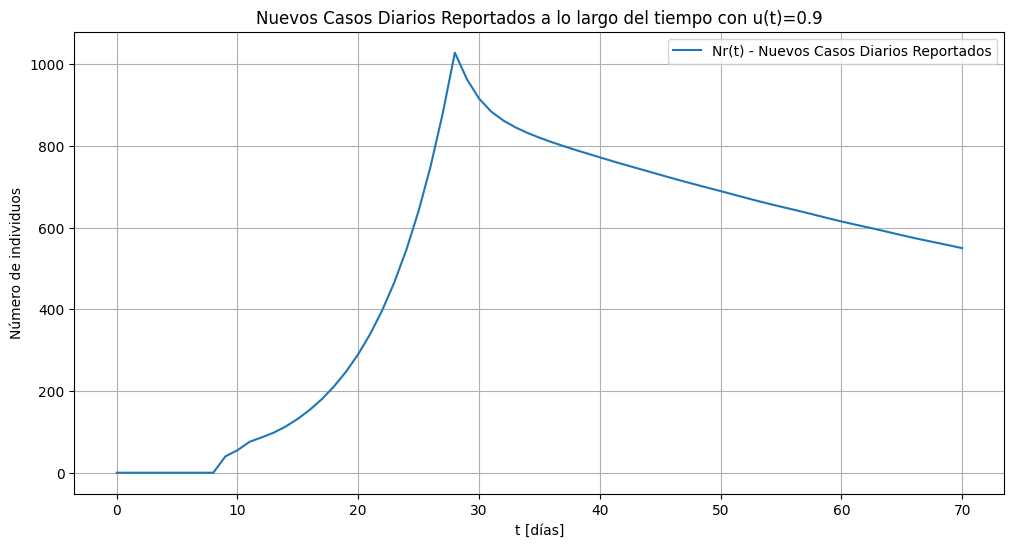

In [900]:
for u_valor in u_valores:
    #Tiempo de simulación
    t_span = [0, 70]  
    t_eval = np.linspace(t_span[0], t_span[1], int(t_span[1] - t_span[0]) + 1)
    sol = solve_ivp(covid_model, t_span, y0, args=(beta_0, t1, rho1, t2, rho2, gamma, epsilon, delta, u_valor), t_eval=t_eval, dense_output=True)

    #Interpolación para manejar retrasos
    sol_interp = sol.sol

    #Calculamos Nr, Ar y Tr con los retrasos
    Nr = np.array([epsilon * sol_interp(sol.t[i] - tau_m)[0] if sol.t[i] >= tau_m else 0 for i in range(len(sol.t))])
    Ar = np.array([sol_interp(sol.t[i] - tau_m)[1] + sol_interp(sol.t[i] - tau_m)[2] if sol.t[i] >= tau_m else I0 + L0 for i in range(len(sol.t))])
    Tr = np.array([sol_interp(sol.t[i] - tau_m)[3] if sol.t[i] >= tau_m else T0 for i in range(len(sol.t))])

    #Graficar Ar y Tr
    plt.figure(figsize=(12, 6))
    plt.plot(sol.t, Ar, label='Ar(t) - Casos Activos Reportados')
    plt.plot(sol.t, Tr, label='Tr(t) - Total de Casos Reportados')
    plt.title(f'Casos Activos y Totales Reportados acumulados con u(t)={u_valor}')
    plt.xlabel('t [días]')
    plt.ylabel('Número de individuos')
    plt.legend()
    plt.grid(True)
    plt.show()

    #Graficar Nr
    plt.figure(figsize=(12, 6))
    plt.plot(sol.t, Nr, label='Nr(t) - Nuevos Casos Diarios Reportados')
    plt.title(f'Nuevos Casos Diarios Reportados a lo largo del tiempo con u(t)={u_valor}')
    plt.xlabel('t [días]')
    plt.ylabel('Número de individuos')
    plt.legend()
    plt.grid(True)
    plt.show()

De los graficos podemos inferir que:

- Mientras menos medidas de aislamiento se adoptan ($u(t) < 0.7$), las curvas de los casos activos $A_{r}$ crece exponencialmente y por lo tanto las curvas de nuevos casos reportados $N_{r}$ también se ven afectadas.
- En cambio cuando las medidas contra el COVID-19 son estrictas (con entradas $u(t)$ a $1$), los casos activos $A_{r}$ se estabilizan en un punto de equilibrio y la cantidad de nuevos casos reportados $N_{r}$ cae exponencialmente.

## Representación en espacio de estados
La representación del vector de estado transpuesto se puede observar a continuación:

$$
\mathbf{x}(t)^T = [x_1, x_2, x_3, x_4]
$$

Donde:

$$
\begin{align*}
x_1 = E_t, \quad
x_2 = I_t, \quad
x_3 = L_t, \quad
x_4 = T_t, \quad
u_1 = u(t)
\end{align*}
$$

El espacio de estado, se puede obtener linealizando el modelo mediante Taylor de primer orden,

$$
\Delta\dot x_j \approx \frac{dx_j}{dt} \approx f(\mathbf{x}_{ie}, u_{1e}) + K_{ji}  \Delta x_i + \frac{\partial f_j}{\partial u_1} \Bigg|_{\substack{\mathbf{x_i}=\mathbf{x}_{ie} \\ u_1 =u_{1e}}} \Delta u_1
$$

donde

$$ K_{ji} = \frac{\partial f_j}{\partial x_i} \Bigg|_{\substack{\mathbf{x_i}=\mathbf{x}_{ie} \\ u_1 =u_{1e}}}
$$

$$\Delta x_i = x_i - x_{ie}$$
$$\Delta u_1 = u_1 - u_{1e}$$

El modelo de espacio de estado resultante para una salida $Y(t)=[\Delta\dot N_r,  \Delta\dot A_r,  \Delta\dot T_r  ]^T$:

$$
\begin{align*}
\dot{\mathbf{x}}(t) & = A\mathbf{x}(t) + B\mathbf{u}(t) \\
Y(t) & = C\mathbf{x}(t) \\
\end{align*}
$$

Los vectores $\dot{\mathbf{x}}(t)$, $\mathbf{x}(t)$ y $\mathbf{u}(t)$ resultantes:

$$
\dot{\mathbf{x}}(t)^T = [\Delta  \dot{x}_1, \Delta \dot{x}_2, \Delta \dot{x}_3, \Delta \dot{x}_4]
$$

$$
{\mathbf{x}}(t)^T = [\Delta{x}_1, \Delta {x}_2, \Delta {x}_3, \Delta {x}_4]
$$

$$
{\mathbf{u}}(t) = \Delta u_1
$$

donde

$$
A = \begin{bmatrix}
-\epsilon & \frac{\beta_{0}}{\mu_{e}} & 0 & 0  \\
\epsilon & -\gamma & 0 & 0  \\
0 & \gamma  & \delta & 0 \\
\epsilon & 0 & 0 & 0 \\
\end{bmatrix}
$$

$$
B^T = \begin{bmatrix}
\beta_{0} I_{te} & 0 & 0 & 0
\end{bmatrix}
$$

Falta la matriz C:
$$
C = \begin{bmatrix} 1 & 0 & 0 & 0 & 0 & 0 \end{bmatrix}
$$

Los puntos de equilibrio se pueden obtener cuando las ecuaciones diferenciales no sufren cambios:


$$\frac{dE_{t}}{dt} = \frac{dI_{t}}{dt} = \frac{dL_{t}}{dt} = \frac{dT_{t}}{dt} = 0$$

por lo tanto,

$$E_{t}=\frac{\beta_{0}}{\epsilon u_e}I_{t}$$

$$I_{t}=\frac{\epsilon}{\gamma}E_{t}$$

$$L_{t}=\frac{\gamma}{\delta}I_{t}$$

$$T_{t} = 0 $$

Para encontrar un punto de equilibrio solo basta encontrar $I_{t}$.


In [901]:
#Función de entrada u(t)
def u(t):
    return 0.9  #Valor constante 

#Tasa de transmisión que cambia en el tiempo
def beta(t, beta_0, t1, rho1, t2, rho2):
    #u(t) es monotonica decreciente
    ut = u(t)
    if t < t1:
        return beta_0/ut
    elif t < t2:
        return (beta_0 * rho1)/ut
    else:
        return (beta_0 * rho2)/ut

def covid_model(t, y, beta_0, t1, rho1, t2, rho2, gamma, epsilon, delta):
    E, I, L, T = y
    beta_t = beta(t, beta_0, t1, rho1, t2, rho2)
    
    dEdt = beta_t* I - epsilon * E
    dIdt = epsilon * E - gamma * I
    dLdt = gamma * I - delta * L
    dTdt = epsilon * E
    
    return [dEdt, dIdt, dLdt, dTdt]


In [902]:
#Resolver el modelo
t_span = [0, 600]  # Un periodo que abarque suficiente tiempo
t_eval = np.linspace(t_span[0], t_span[1], int(t_span[1] - t_span[0]) + 1)
sol = solve_ivp(covid_model, t_span, y0, args=(beta_0, t1, rho1, t2, rho2, gamma, epsilon, delta), t_eval=t_eval, dense_output=True)
It=sol.y[1]

In [903]:
# Calcular los valores de equilibrio a partir de Ite
Ite = np.mean(It[-50:])
print(f"Ite: {Ite:.2f}")

Ite: 5.29


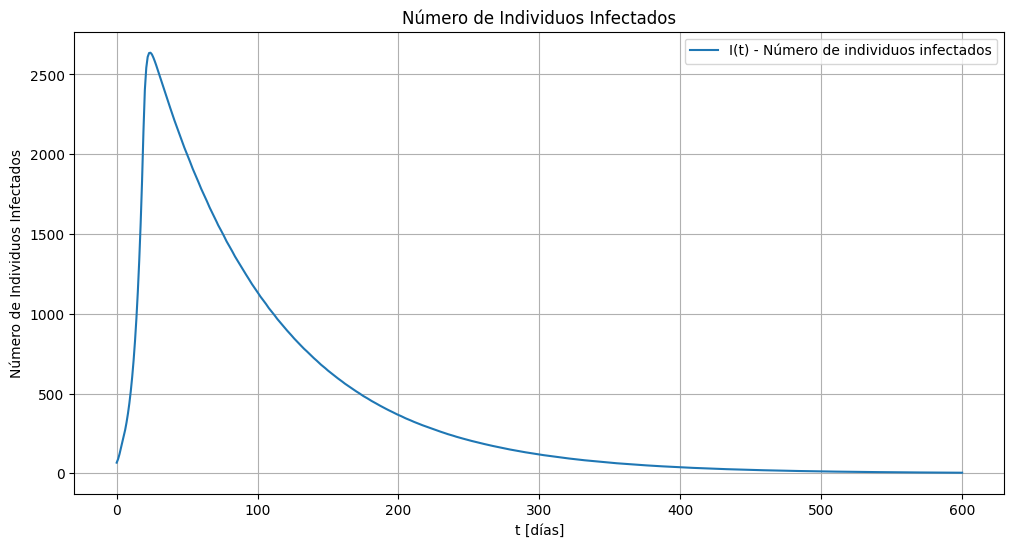

In [904]:
#Graficar I(t)
plt.figure(figsize=(12, 6))
plt.plot(sol.t, sol.y[1], label='I(t) - Número de individuos infectados')
plt.title('Número de Individuos Infectados')
plt.xlabel('t [días]')
plt.ylabel('Número de Individuos Infectados')
plt.legend()
plt.grid(True)
plt.show()